In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras.callbacks import Callback
from sklearn.model_selection import train_test_split


import functions.parse_data as parse
import functions.models as md
import functions.handy_functions as hf

In [2]:

data_water=parse.parse('cloudrm_water.dat')
data_water=data_water.drop(columns=['Surface_Desc'])

In [3]:
data_water

,Cloud_B01,Cloud_B02,Cloud_B03,Cloud_B04,Cloud_B05,Cloud_B06,Cloud_B07,Cloud_B08,Cloud_B09,Cloud_B10,...,Clear_B12,Clear_B13,Sat_Zenith_Angle,Sun_Zenith_Angle,Azimuth_Diff_Angle,COT,Cloud_Type,Profile_ID,GOT,Water_Vapor
0,0.61359,0.89822,0.82430,0.84322,0.75232,0.79863,0.86702,0.75245,0.91433,0.38607,...,0.91403,0.38977,4.35,56.99,22.96,23.397,2,8973,0.129,6.37
1,0.20905,0.29968,0.27558,0.37609,0.27122,0.48121,0.90663,0.86953,0.91666,0.40817,...,0.94397,0.84026,12.27,60.32,81.41,2.452,2,3598,0.123,0.46
2,0.33639,0.37579,0.39177,0.55448,0.47159,0.79124,0.93204,0.88240,0.94466,0.37695,...,0.77680,0.58545,2.12,55.76,50.24,6.564,5,9625,0.122,0.69
3,0.71806,0.73411,0.70360,0.76401,0.74330,0.80824,0.99764,0.89247,1.03605,0.41092,...,0.93925,0.84693,1.46,44.21,106.95,29.710,3,6165,0.128,2.96
4,0.60382,0.61763,0.60034,0.65471,0.70713,0.73157,0.75289,0.76990,0.79839,0.66608,...,0.96311,0.95261,12.33,40.58,172.91,17.975,4,2862,0.105,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.69136,0.68442,0.64557,0.69067,0.70439,0.74204,0.97558,0.95355,0.98446,0.56716,...,0.75942,0.54770,7.99,49.73,135.42,29.080,3,3004,0.125,0.28
49996,0.25974,0.30488,0.29403,0.42186,0.29809,0.53849,0.99243,0.97832,0.99828,0.66582,...,0.88795,0.82056,12.70,48.13,152.72,4.465,1,1250,0.116,0.17
49997,0.55643,0.54133,0.46411,0.49833,0.51500,0.52236,0.52566,0.51988,0.53211,0.36141,...,0.28788,0.35571,5.57,75.24,58.63,21.735,4,3685,0.125,0.24
49998,0.11381,0.20042,0.19682,0.30372,0.17694,0.41548,1.01226,0.92714,1.03634,0.17267,...,0.70533,0.46856,14.70,41.98,17.80,0.535,2,7320,0.111,3.15


Train test split below att the moment gives 60/20/20 split.

In [4]:
##Train test validation split##
X_labels= ['Cloud_B01','Cloud_B02','Cloud_B03','Cloud_B04','Cloud_B05','Cloud_B06',
           'Cloud_B07','Cloud_B08','Cloud_B09','Cloud_B10','Cloud_B11','Cloud_B12','Cloud_B13',
           'Sat_Zenith_Angle','Sun_Zenith_Angle','Azimuth_Diff_Angle','COT','Cloud_Type','Profile_ID','GOT','Water_Vapor']

y_labels=['Clear_B01','Clear_B02','Clear_B03','Clear_B04','Clear_B05','Clear_B06',
           'Clear_B07','Clear_B08','Clear_B09','Clear_B10','Clear_B11','Clear_B12','Clear_B13']

df=hf.normalise_input_df(data_water,X_labels)
num_epochs=20
batch_size=100
model, history_df, X_test,y_test=md.train_simple_model(df,x_labels=X_labels,y_labels=y_labels,split=[0.6,0.2,0.2],epochs=num_epochs,batch_size=batch_size)




Epoch 1/20

320/320 [==============================] - 8s 24ms/step - loss: 0.0399 - mse: 0.0399 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2/20
320/320 [==============================] - 7s 23ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3/20
320/320 [==============================] - 7s 23ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 4/20
320/320 [==============================] - 8s 24ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 5/20
320/320 [==============================] - 7s 23ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 6/20
320/320 [==============================] - 7s 23ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 7/20
320/320 [==============================] - 8s 24ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 8/20
320/320 [==============================] - 7s 23ms/step

In [5]:
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=2)
print(f"Test mse: {test_mse}")

313/313 - 2s - loss: 0.0019 - mse: 0.0019 - 2s/epoch - 7ms/step
Test mse: 0.0019430021056905389


In [6]:
y_predict=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


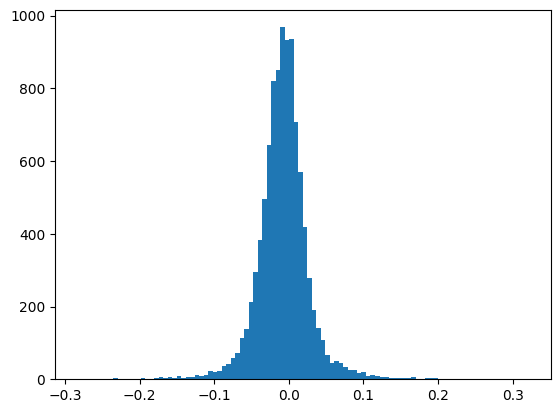

In [7]:
y_test_np=y_test.to_numpy()
channel=5
plt.hist(y_predict[:,channel]-y_test_np[:,channel],bins=100)
plt.show()

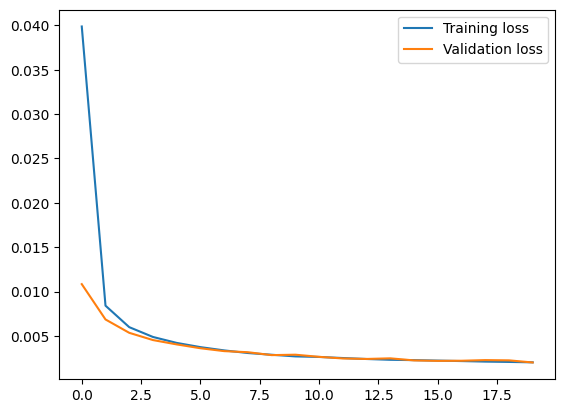

In [8]:
plt.plot(history_df['training_loss'])
plt.plot(history_df['validation_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.show()

In [12]:

hf.save_model_and_test_data('./models/simple_model_'+str(num_epochs)+'epoch_'+str(batch_size)+'batch',model=model,X_test=X_test,y_test=y_test)

INFO:tensorflow:Assets written to: ./models/simple_model_200epoch_100batch\assets


INFO:tensorflow:Assets written to: ./models/simple_model_200epoch_100batch\assets
